# Overview of the Lung cell atlas

In here I will highlight the different compartments of the Lung cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment. I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality.

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=100, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
storage_path = '/mnt/storage/Github/Immune_Adaptation_Atlas/h5ad_files/'

In [4]:
adata = sc.read_h5ad(storage_path + 'lung_5loc_sc_sn_cellxgene_allgenes_05122022.h5ad')
adata

AnnData object with n_obs × n_vars = 193108 × 1147
    obs: 'Celltypes', 'Celltypes_master_high', 'Celltypes_master_higher', 'Celltypes_master_higher_immune', 'Loc_true', 'Material', 'Donor', 'Donor_ID_2', 'Gender', 'Sample', 'ID', 'Protocol_plot', 'Version', 'Study', 'PoolDon', 'DonorPool', 'scDonor_snBatch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'gene_ids-0', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'feature_types-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Celltypes_colors', 'Celltypes_int_F_colors', 'Celltypes_int_colors', 'Celltypes_int_updB_colors', 'Celltypes_master_high_colors', 'ID_colors', 'Loc_true_colors', 'hvg', 'leiden', 'leiden_co

## Get the lognormalised data
In the object the data is scaled, but for getting the HVG and the differential expression test I need the lognormalised data. I can get the data from "raw" 

In [5]:
adata.X

array([[ 2.723888  , -0.13999495, -0.14079645, ..., -0.27268326,
        -0.33524194, -0.3504049 ],
       [-0.19735305, -0.09117872, -0.14302921, ..., -0.27248234,
        -0.28699496, -0.3332542 ],
       [-0.28152832, -0.15271589, -0.16228533, ..., -0.2495218 ,
        -0.22978438, -0.27122813],
       ...,
       [-0.18554066, -0.08244095, -0.14020841, ..., -0.2758336 ,
        -0.29558146, -0.34238952],
       [-0.2587889 , -0.10451216, -0.12044319, ..., -0.29565158,
        -0.41769755, -0.4212264 ],
       [-0.19435559, -0.08509707, -0.13782981, ..., -0.27821857,
        -0.31027728, -0.35187703]], dtype=float32)

In [6]:
adata.raw

In [7]:
adata.X.max()

10.0

In [8]:
adata = adata.raw.to_adata()

In [9]:
adata.X

<193108x20922 sparse matrix of type '<class 'numpy.float32'>'
	with 277931444 stored elements in Compressed Sparse Row format>

In [10]:
adata.X.min()

0.0

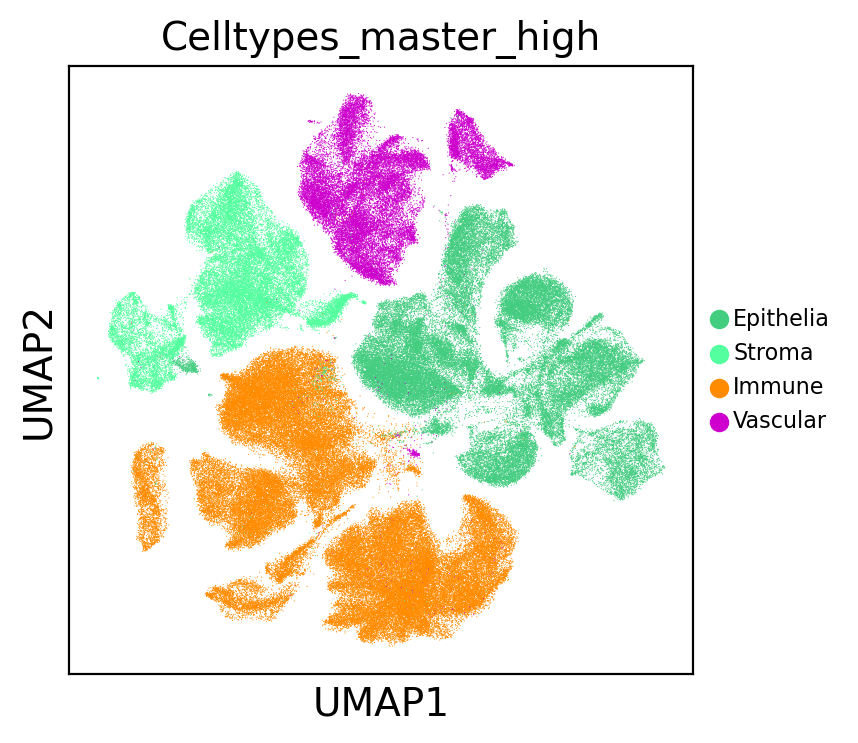

In [11]:
sc.pl.umap(adata, color=["Celltypes_master_high"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

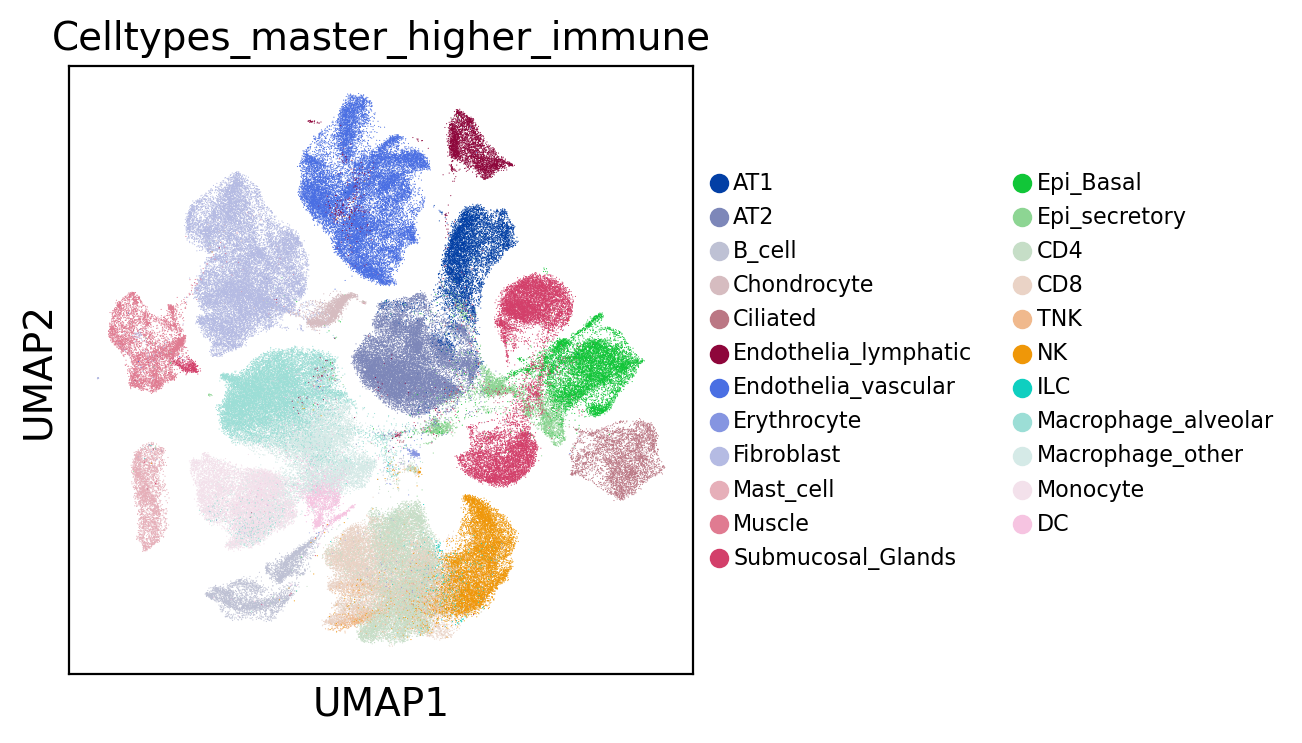

In [12]:
sc.pl.umap(adata, color=["Celltypes_master_higher_immune"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

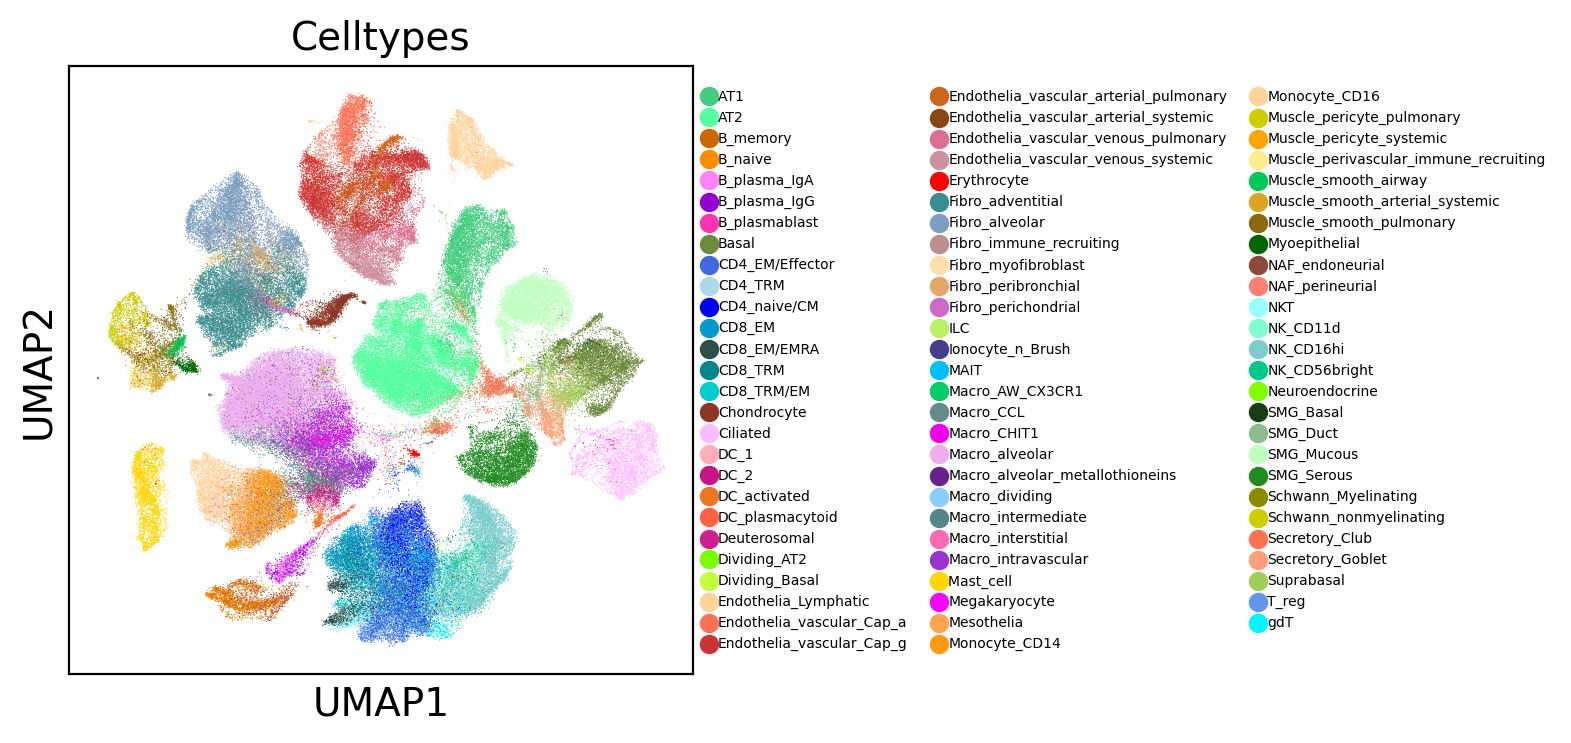

In [13]:
sc.pl.umap(adata, color=["Celltypes"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=5)

In [14]:
adata.obs["Celltypes_master_high"].cat.categories

Index(['Epithelia', 'Stroma', 'Immune', 'Vascular'], dtype='object')

In [15]:
adata.obs["Celltypes_master_higher_immune"].cat.categories

Index(['AT1', 'AT2', 'B_cell', 'Chondrocyte', 'Ciliated',
       'Endothelia_lymphatic', 'Endothelia_vascular', 'Erythrocyte',
       'Fibroblast', 'Mast_cell', 'Muscle', 'Submucosal_Glands', 'Epi_Basal',
       'Epi_secretory', 'CD4', 'CD8', 'TNK', 'NK', 'ILC',
       'Macrophage_alveolar', 'Macrophage_other', 'Monocyte', 'DC'],
      dtype='object')

In [16]:
adata_immune = adata[adata.obs['Celltypes_master_high'].isin(['Immune'])]

In [17]:
adata_immune.write(storage_path + 'Lung_Immune_compartment.h5ad' )